<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/07_01_kosaraju_scc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import graphviz as gv
import numpy as np
import pandas as pd

In [ ]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [ ]:
%%file 1.in

4
8
6
7
2
9
1
5 6
3 7

Writing 1.in


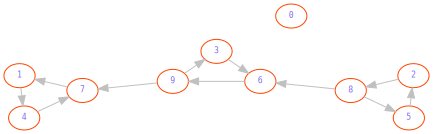

In [ ]:
G, _ = readAdjl('1.in')
adjlShow(G, directed=True)

In [ ]:
def reverse(G):
  n = len(G)
  Grev = [[] for _ in range(n)]
  for u in range(n):
    for v in G[u]:
      Grev[v].append(u)
  return Grev

In [ ]:
def kosaraju(G):
  n = len(G)
  visited = [False]*n
  f = []

  # (1) producir grafo reverso
  Grev = reverse(G)

  # (2) producir orden de finalización con dfs sobre grafo reverso
  def dfs1(u):
    visited[u] = True
    for v in Grev[u]:
      if not visited[v]:
        dfs1(v)
    f.append(u)

  # (3) producir componentes
  def dfs2(u, cc):
    visited[u] = True
    for v in G[u]:
      if not visited[v]:
        dfs2(v, cc)
    cc.append(u)

  for u in range(n):
    if not visited[u]:
      dfs1(u)

  scc = []
  visited = [False]*n
  for u in reversed(f):
    if not visited[u]:
      cc = []
      dfs2(u, cc)
      scc.append(cc)

  return scc

In [ ]:
kosaraju(G)

[0, 4, 3, 5, 2, 8, 6, 9, 7, 1]


[[7, 4, 1], [6, 3, 9], [2, 5, 8], [0]]